# Classification of SEM of Nanopaticles Images

This project is being done to classify SEM of Nanopaticles Images taken from the university relevant labs. For improving the progress, we've divided this work into 3 aproaches.

First approach is supervised classification. Labels are known (two labels exist) and classification is done by finite number of train images (100 images). This work is basicaly prominent for initiating our effort, however the forwarding approachs are required for putting it forward.

Second approach comes out of our necessity of large amount of train images. There is a generative work before the classification. Our work is still supervised but with large amount of generated train samples, we have more accuracy. Moreover every test data supposed to be appended to train data in the testing process.

Last approach is unsupervised to let the model emmit the labels and work more intelligent. Therefore, we got a part in the model that cluster train data and samples generated for training in the approach two.

Let's start first one!

# Approach One: Supervised with finite data

In the first approach, we've build a deep learning model using Keras. The model is a convolutional neural network built into several layers. Train and test data is a group of jpg images that you can see one of them below. Images are being grayscale and resized as 500 x 300 pixels. 

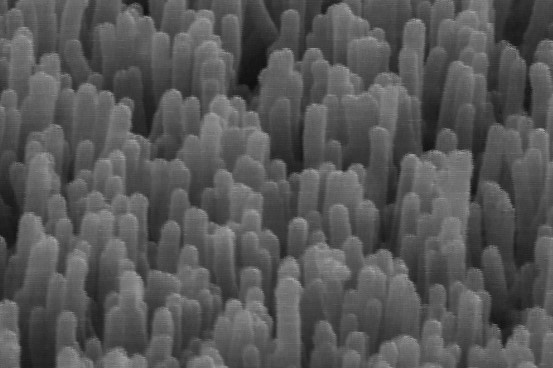

Coding and evaluating model is shown below.

In [1]:
# Importing related libraries
import numpy as np
import pandas as pd
import keras
import cv2
import glob
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, Dropout 
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
cwd = os.getcwd()
os.chdir("C:/Users/toranj/Desktop/DL Python")

E:\Software\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Predefined functions

# Sharpen func to sharpen the input images by the "Unsharp Mask" method. 
# Sharpfactor is an int betweeen 0 and 1 determines how much high the result is to be sharpened.
def sharpen(img,sharpfactor):
    threshold = 0.5
    blurred = cv2.GaussianBlur(img,ksize = (3,3),sigmaX=0)
    masked = np.abs(img - blurred) < threshold
    image = cv2.addWeighted(blurred, -sharpfactor, img , (1+sharpfactor), gamma = 0)
    binmasked = masked.astype(bool)
    image = image * (binmasked.astype(image.dtype))
    return image
                                    

In [3]:
# Loading train images
image_path = "C:/Users/toranj/Desktop/DL Python/SEM of Nanoparticles/"          # path of train images
images = glob.glob(image_path +"*.png")                                         # selecting images
images.sort()                                                                   # sorting images
final_images=[]
for img in images:    
    image = cv2.imread(img,0)                                          # loading images in grayscale
    image = cv2.resize(image,(500,300))                                # resizing images
    image = image / np.max(image)                                      # Normalization
    image = sharpen(image,0.6)
    image = image.tolist()
    final_images.append(image)


In [4]:
# loading train labels
labels = pd.read_excel("SEM Labels.xlsx")
final_labels = labels.values.tolist()
# split data
img_train, img_test, lbl_train, lbl_test = train_test_split(final_images, final_labels,
                                                            test_size=0.1, random_state=42, stratify=final_labels)

In [ ]:
# Creating Convolutional Model
def BuildModel():
    CNT_Model = Sequential()
    
    reg = regularizers.l1_l2(l1 = 0.001, l2 = 0.002)
    
    CNT_Model.add(Conv2D(20,5, activation = 'relu',strides=3, padding = 'same',kernel_regularizer = None, input_shape =(300,500,1)))
    CNT_Model.add(Conv2D(20,5, activation = 'relu',strides=2, padding = 'same', kernel_regularizer = None))
    CNT_Model.add(MaxPooling2D(pool_size = (2,2)))
    CNT_Model.add(Dropout(0.8))
    CNT_Model.add(Conv2D(40,5, activation = 'relu', padding = 'same', kernel_regularizer = reg))
    CNT_Model.add(MaxPooling2D(pool_size = (2,2)))
    CNT_Model.add(Conv2D(40,5, activation = 'relu', padding = 'same', kernel_regularizer = reg))
    CNT_Model.add(Dropout(0.5))
    CNT_Model.add(Flatten())
    CNT_Model.add(Dense(15,activation = 'relu', kernel_regularizer = None))       
    CNT_Model.add(Dropout(0.5))
    #CNT_Model.add(BatchNormalization())
    CNT_Model.add(Dense(8,activation = 'relu', kernel_regularizer = None))
    #CNT_Model.add(BatchNormalization())
    CNT_Model.add(Dense(3,activation='softmax'))

    Optimizer = keras.optimizers.SGD(lr=0.01, momentum = 0.5, decay = 1e-5, nesterov = True)
   
    CNT_Model.compile(optimizer=Optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return CNT_Model
CNT_Model = BuildModel()
CNT_Model.summary()

In [10]:
# Training model

img_train = np.reshape(img_train,(len(img_train),300,500,1))
img_test = np.reshape(img_test,(len(img_test),300,500,1))
ann_hist = SEM_Model.fit(np.array(img_train), np.array(lbl_train), batch_size = 3, epochs = 200)

Epoch 1/200
45/45 [==============================] - 1s 26ms/step - loss: 1.1229 - acc: 0.3556 ETA: 0s - loss: 1.1302 -
Epoch 2/200
45/45 [==============================] - 1s 26ms/step - loss: 1.1252 - acc: 0.3556
Epoch 3/200
45/45 [==============================] - 1s 27ms/step - loss: 1.1241 - acc: 0.3556
Epoch 4/200
45/45 [==============================] - 1s 27ms/step - loss: 1.1267 - acc: 0.3556
Epoch 5/200
45/45 [==============================] - 1s 26ms/step - loss: 1.1236 - acc: 0.3556
Epoch 6/200
45/45 [==============================] - 1s 26ms/step - loss: 1.1228 - acc: 0.3556
Epoch 7/200
45/45 [==============================] - 1s 28ms/step - loss: 1.1235 - acc: 0.3556
Epoch 8/200
45/45 [==============================] - 1s 28ms/step - loss: 1.1221 - acc: 0.3556
Epoch 9/200
45/45 [==============================] - 1s 27ms/step - loss: 1.1216 - acc: 0.3556
Epoch 10/200
45/45 [==============================] - 1s 26ms/step - loss: 1.1228 - acc: 0.3556
Epoch 11/200
45/45 [====

45/45 [==============================] - 1s 29ms/step - loss: 1.1151 - acc: 0.3556
Epoch 86/200
45/45 [==============================] - 1s 29ms/step - loss: 1.1134 - acc: 0.3556
Epoch 87/200
45/45 [==============================] - 1s 28ms/step - loss: 1.1176 - acc: 0.3556
Epoch 88/200
45/45 [==============================] - 1s 29ms/step - loss: 1.1156 - acc: 0.3556
Epoch 89/200
45/45 [==============================] - 1s 30ms/step - loss: 1.1166 - acc: 0.3556
Epoch 90/200
45/45 [==============================] - 1s 27ms/step - loss: 1.1138 - acc: 0.3556
Epoch 91/200
45/45 [==============================] - 1s 29ms/step - loss: 1.1143 - acc: 0.3556
Epoch 92/200
45/45 [==============================] - 1s 28ms/step - loss: 1.1169 - acc: 0.3556
Epoch 93/200
45/45 [==============================] - 1s 28ms/step - loss: 1.1147 - acc: 0.3556
Epoch 94/200
45/45 [==============================] - 1s 27ms/step - loss: 1.1164 - acc: 0.3556
Epoch 95/200
45/45 [==============================] -

KeyboardInterrupt: 

In [33]:
# Model Evaluation
SEM_Model.evaluate(np.array(img_test), np.array(lbl_test), batch_size = 2)
labels_predicted = SEM_Model.predict(np.array(img_test))
lbl= np.argmax(labels_predicted, axis=1)


5/5 [==============================] - 0s 6ms/step


<function matplotlib.pyplot.legend>

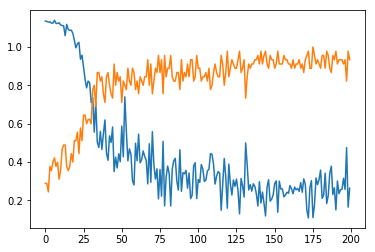

In [36]:
# Plotting results

hist = ann_hist.history
loss = hist['loss']
acc = hist['acc']
plt.plot(loss)
plt.plot(acc)
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend


# Approach Two: Supervised with Increased Data

In this stage, we have a chore to increasing amount of train images and labels to improve accuracy and flexibility of neural network. First of all, images should be feature extracted at lowest level and generated features should help to repair some images as to be generated images with assistant of a generative autoencoder. Encoding stage is extracting features and decoding one is reconstructing images out of extracted features. As we got rich data to train, we can have our layers improve theirselves and tune our hyperparameters.

Another mission ought to be accomplished in this stage is building a test program that enters any test image to the last train image dataset. This have been doing till the end of programming.

In [48]:
# Data Augmentation

datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 60,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 60,
    zoom_range = 10,
    fill_mode = 'reflect',
    horizontal_flip = True,
    validation_split = 0.1)

datagen.fit(img_train)
a = datagen.flow(img_train, lbl_train, batch_size=3)

SEM_Model.fit_generator(datagen.flow(img_train, lbl_train, batch_size=100),
                    steps_per_epoch=len(img_train) / 5, epochs=200)

Epoch 1/200
9/9 [==============================] - 7s 754ms/step - loss: 0.6788 - acc: 0.7383
Epoch 2/200
9/9 [==============================] - 7s 752ms/step - loss: 0.6959 - acc: 0.7481
Epoch 3/200
9/9 [==============================] - 7s 758ms/step - loss: 0.6908 - acc: 0.7432
Epoch 4/200
9/9 [==============================] - 7s 738ms/step - loss: 0.7010 - acc: 0.7407
Epoch 5/200
9/9 [==============================] - 7s 736ms/step - loss: 0.7510 - acc: 0.7358
Epoch 6/200
9/9 [==============================] - 6s 711ms/step - loss: 0.6981 - acc: 0.7407
Epoch 7/200
9/9 [==============================] - 7s 757ms/step - loss: 0.7246 - acc: 0.7086
Epoch 8/200
9/9 [==============================] - 7s 794ms/step - loss: 0.6710 - acc: 0.7284
Epoch 9/200
9/9 [==============================] - 6s 720ms/step - loss: 0.6910 - acc: 0.7383
Epoch 10/200
9/9 [==============================] - 7s 735ms/step - loss: 0.7609 - acc: 0.7136
Epoch 11/200
9/9 [==============================] - 7s 774m

9/9 [==============================] - 7s 822ms/step - loss: 0.6466 - acc: 0.7630
Epoch 173/200
9/9 [==============================] - 8s 842ms/step - loss: 0.5207 - acc: 0.8123
Epoch 174/200
9/9 [==============================] - 7s 826ms/step - loss: 0.5910 - acc: 0.7926
Epoch 175/200
9/9 [==============================] - 8s 878ms/step - loss: 0.6916 - acc: 0.7309
Epoch 176/200
9/9 [==============================] - 7s 826ms/step - loss: 0.6475 - acc: 0.7531
Epoch 177/200
9/9 [==============================] - 8s 840ms/step - loss: 0.6148 - acc: 0.7457
Epoch 178/200
9/9 [==============================] - 8s 893ms/step - loss: 0.5346 - acc: 0.8198
Epoch 179/200
9/9 [==============================] - 8s 839ms/step - loss: 0.5636 - acc: 0.8000
Epoch 180/200
9/9 [==============================] - 8s 877ms/step - loss: 0.5810 - acc: 0.8074
Epoch 181/200
9/9 [==============================] - 8s 858ms/step - loss: 0.6451 - acc: 0.7605
Epoch 182/200
9/9 [==============================] - 7